# Applied Data Analysis Course Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns= 163
pd.options.display.max_rows=163

## F. Finding correlations

You will try to find correlations between the different data fields. Your goal is to identify the variables which most affect the nutritional score and provide some insight into which factors cause both a low or a high nutritional score. 

In [2]:
df = pd.read_csv('/data/ml_course/02_Data_Analysis/en.openfoodfacts.org.products.csv', index_col=0, parse_dates=[4, 6])
df.head()

,code,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,brands,categories_en,origins,manufacturing_places,labels,emb_codes,first_packaging_code_geo,cities_tags,purchase_places,stores,countries_en,ingredients_text,allergens,allergens_en,traces_en,serving_size,additives_n,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category_en,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
2,4559,usda-ndb-import,1489069957,2017-03-09 14:32:37+00:00,1489069957,2017-03-09 14:32:37+00:00,Peanuts,Unknown,Unknown,Unknown,Torn & Glasser,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Peanuts, wheat flour, sugar, rice flour, tapio...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,b,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,16087,usda-ndb-import,1489055731,2017-03-09 10:35:31+00:00,1489055731,2017-03-09 10:35:31+00:00,Organic Salted Nut Mix,Unknown,Unknown,Unknown,Grizzlies,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,"Organic hazelnuts, organic cashews, organic wa...",Unknown,Unknown,Unknown,28 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,d,Unknown,Unknown,"To be completed,Nutrition facts completed,Ingr...",Unknown,2540.0,NaN,57.14,5.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.86,3.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,1.22428,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.143,NaN,0.00514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0
4,16094,usda-ndb-import,1489055653,2017-03-09 10:34:13+00:00,1489055653,2017-03-09 10:34:13+00:00,Organic Polenta,Unknown,Unknown,Unknown,Bob's Red Mill,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,United States,Organic polenta,Unknown,Unknown,Unknown,35 g (0.25 cup),0.0,Unknown,0.0,Unknown,0.0,Unknown,Unknown,Unknown,Unknown,"To be completed,Nutritio

In [3]:
# keep only numerical data
df = df.loc[:, 'energy_100g':]

In [4]:
# keep only data with a valid nutrion score
df = df[df['nutrition-score-uk_100g'].notna()]

In [5]:
df.notna().sum()

energy_100g                             221760
energy-from-fat_100g                       586
fat_100g                                220877
saturated-fat_100g                      221760
-caprylic-acid_100g                          0
-capric-acid_100g                            0
-lauric-acid_100g                            0
-myristic-acid_100g                          0
-palmitic-acid_100g                          0
-stearic-acid_100g                           0
-arachidic-acid_100g                         1
-montanic-acid_100g                          0
monounsaturated-fat_100g                 19662
polyunsaturated-fat_100g                 19691
omega-3-fat_100g                           746
-alpha-linolenic-acid_100g                 181
-eicosapentaenoic-acid_100g                 28
-docosahexaenoic-acid_100g                  51
omega-6-fat_100g                           152
-linoleic-acid_100g                        141
-arachidonic-acid_100g                       9
-gamma-linole

In [6]:
# Compute correlations with data that has at least 1000 valid samples
df_corr = df.corr(min_periods=1000)['nutrition-score-uk_100g'].dropna()
df_corr = df_corr.sort_values(ascending=False)
df_corr

nutrition-score-uk_100g        1.000000
nutrition-score-fr_100g        0.978946
energy_100g                    0.655148
saturated-fat_100g             0.652078
fat_100g                       0.594066
sugars_100g                    0.449722
vitamin-d_100g                 0.365022
monounsaturated-fat_100g       0.355442
polyunsaturated-fat_100g       0.292929
carbohydrates_100g             0.256601
phosphorus_100g                0.187520
proteins_100g                  0.132204
sodium_100g                    0.126961
salt_100g                      0.126960
alcohol_100g                   0.104537
calcium_100g                   0.086371
vitamin-b2_100g                0.083584
potassium_100g                 0.064386
trans-fat_100g                 0.044813
vitamin-e_100g                 0.038873
cholesterol_100g               0.032509
vitamin-pp_100g                0.025482
magnesium_100g                 0.020101
pantothenic-acid_100g          0.018619
vitamin-b6_100g                0.014828


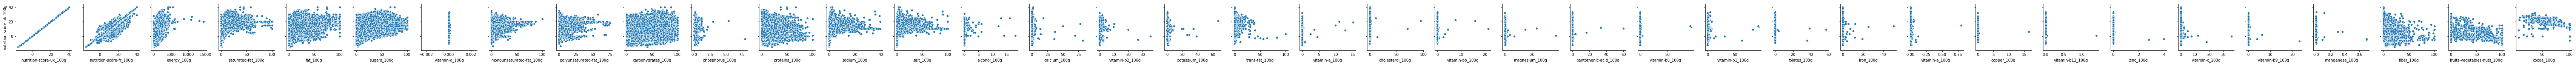

In [7]:
sns.pairplot(df, x_vars=df_corr.index, y_vars=['nutrition-score-uk_100g'], dropna=True)

Highest score is correlated with more energy, more (saturated) fat and more sugar. Lower score is achieved with more content of fruits, vegetables and nuts and cocoa